# Churn Prediction 

The provided code is aimed at churn prediction, which refers to predicting whether customers are likely to discontinue their services. The analysis involves loading a dataset, performing data cleaning, and exploring various visualizations to understand the patterns and factors influencing customer churn.

## About Dataset

The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## 1. Importing Libraries:

NumPy, Pandas, Statsmodels, Matplotlib, and Seaborn are imported for data manipulation, statistical modeling, and visualization.

## 2. Loading Data:

The dataset is loaded from a specified file path using Pandas.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
#load data
file_path = r'C:\Users\Khushi Bakshi\Desktop\EDA\archive (2).zip'
df = pd.read_csv(file_path)

In [2]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1860,3279-DYZQM,Male,0,Yes,Yes,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.45,1378.45,No
3069,1784-BXEFA,Female,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.55,187.35,No
819,4178-EGMON,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),88.00,5986.45,No
1348,1184-PJVDB,Male,0,Yes,No,10,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.95,857.2,Yes
5633,1222-LRYKO,Male,0,No,Yes,6,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,26.35,184.05,No
4445,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
4740,2778-OCLGR,Male,1,Yes,No,24,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),39.10,971.3,Yes
5021,6617-WLBQC,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,One year,No,Credit card (automatic),81.85,1810.85,No
334,2868-SNELZ,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,80.60,155.8,Yes
717,9944-AEXBM,Male,0,No,No,32,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,2664.3,No


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

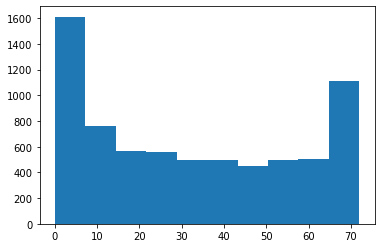

In [5]:
# show the distribution of tenure.
plt.hist(data = df, x = 'tenure');

In [6]:
df_copy = df.copy()

## 3. Data Exploration and Cleaning:

Several commands are used to explore the dataset, including displaying a sample of rows, general statistics, and the distribution of the 'Contract' variable.
The 'TotalCharges' column is initially set to None and then converted to float64 type after cleaning, where it is assigned the product of 'tenure' and 'MonthlyCharges'.

The cleaned dataset is then saved to a CSV file.

In [7]:
#Cleaning 1: The data type of “TotalCharges” should be the float64 type instead of the object type
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)

In [8]:
#test the results
df_copy.TotalCharges.dtype

dtype('float64')

In [9]:
#Cleaning 2: Many rows of “TotalCharges” do not equal each tenue times monthly charges.
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

In [10]:
# test results 
df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape


(0, 21)

In [11]:
# store the clean data
df_copy.reset_index(drop=True)
df_copy.to_csv('Telco-Customer-Churn_clean.csv')

## 4. Custom Function 'desc':

A custom function 'desc' is defined to set various plot properties based on the provided arguments.

In [12]:
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

## 5. Visualization of Churned Customers:

Histogram and descriptive statistics are used to analyze the 'TotalCharges' of customers who have churned ('Churn'=="Yes").

In [13]:
Churn_df = df_copy.query('Churn=="Yes"')
Churn_df.TotalCharges.describe()

count    1869.000000
mean     1531.608828
std      1886.774930
min        18.850000
25%       137.900000
50%       700.000000
75%      2334.800000
max      8481.600000
Name: TotalCharges, dtype: float64

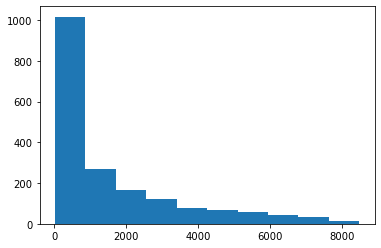

In [14]:
plt.hist(data = Churn_df, x = 'TotalCharges');

## 6. Further Visualization and Analysis:

Several visualizations are created to compare the characteristics of customers who churned and those who didn't.
The data is divided into two groups based on the 80th percentile of 'TotalCharges', and various aspects such as contract type, internet service, and additional services are analyzed for both groups.

In [15]:
#find the 80th percentile of the data in total charges
Churn_df.TotalCharges.quantile(0.8)

2827.5900000000006

In [16]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
TotalCharges_under80 = Churn_df.query('TotalCharges<=2827.59')
TotalCharges_above80 = Churn_df.query('TotalCharges>2827.59')

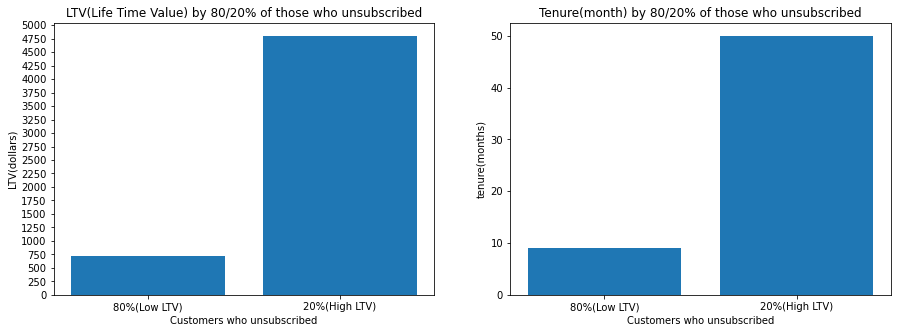

In [17]:
# Visualize both
plt.figure(figsize = [15, 5])
# left plot: LTV by above and under 80th percentile of data who unsubscribed
plt.subplot(1, 2, 1)
plt.bar([1, 2], [713, 4801])
desc(yticks1=range(0,5250,250), yticks2=range(0,5250,250), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='LTV(dollars)',xlabel='Customers who unsubscribed', title='LTV(Life Time Value) by 80/20% of those who unsubscribed')

# # right plot: Tenure by above and under 80th percentile of data who unsubscribed
plt.subplot(1, 2, 2)
plt.bar([1, 2], [9, 50])
desc(xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)',xlabel='Customers who unsubscribed', title='Tenure(month) by 80/20% of those who unsubscribed')

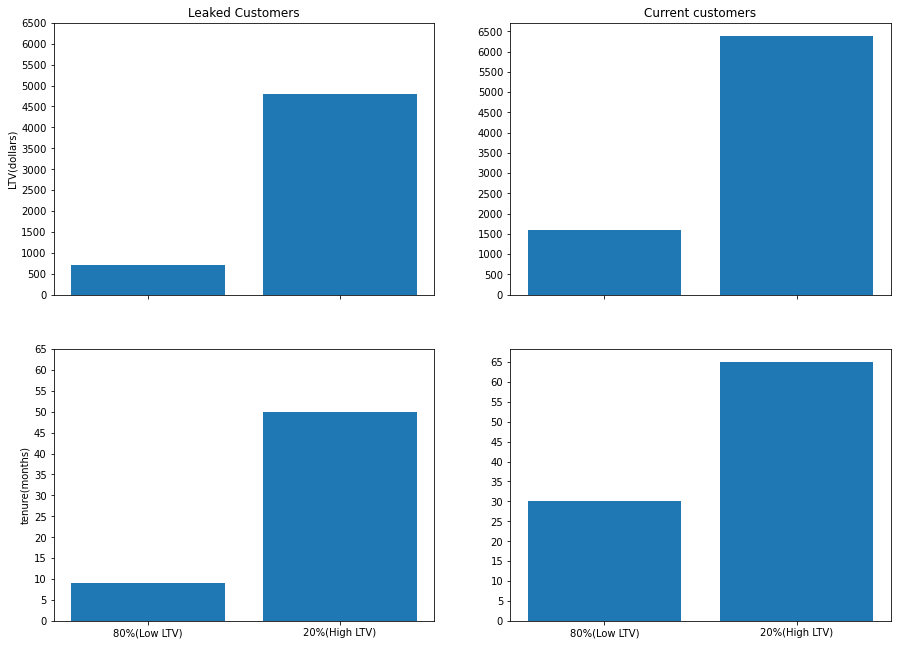

In [18]:
plt.figure(figsize = [15, 11])
# left plot: LTV by above and under 80th percentile of data who unsubscribed
plt.subplot(2, 2, 1)
plt.bar([1, 2], [713, 4801])
desc(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['', ''],ylabel='LTV(dollars)', title='Leaked Customers')
# # right plot: Tenure by above and under 80th percentile of data who unsubscribed
plt.subplot(2, 2, 2)
plt.bar([1, 2], [1589, 6389])
desc(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['', ''], title='Current customers')

# left plot: LTV by above and under 80th percentile of data who are still paying the service
plt.subplot(2, 2, 3)
plt.bar([1, 2], [9, 50])
desc(yticks1=range(0,70,5), yticks2=range(0,70,5),xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)')

# # right plot: Tenure by above and under 80th percentile of data who are still paying the service
plt.subplot(2, 2, 4)
plt.bar([1, 2], [30, 65])
desc(yticks1=range(0,70,5), yticks2=range(0,70,5), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'])

In [19]:
# Extract those who unsubscribed the service
Churn_df = df_copy.query('Churn=="Yes"')
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
TotalCharges_under80 = Churn_df.query('TotalCharges<=2827.59')
TotalCharges_above80 = Churn_df.query('TotalCharges>2827.59')
# Extract those who are paying the service
paying_df = df_copy.query('Churn=="No"')
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
paying_TotalCharges_under80 = paying_df.query('TotalCharges<=4890')
paying_TotalCharges_above80 = paying_df.query('TotalCharges>4890')

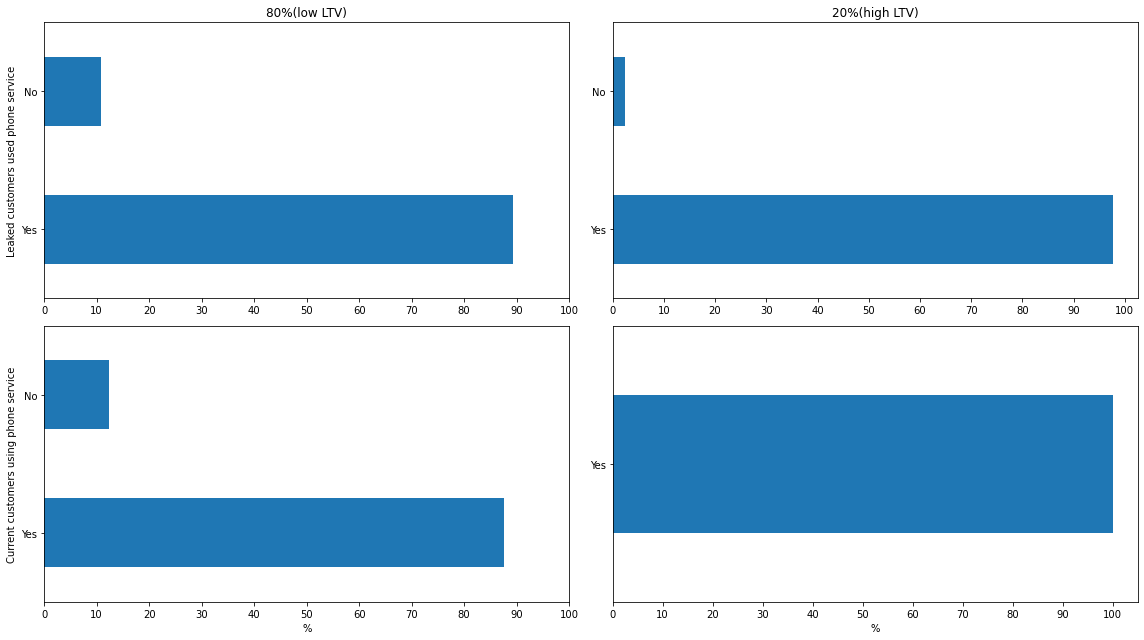

In [20]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.PhoneService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(title="80%(low LTV)",ylabel='Leaked customers used phone service',xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.PhoneService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV)",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

# Investigate the proportion of people used phone service by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.PhoneService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(xlabel="%",ylabel='Current customers using phone service',xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.PhoneService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc( xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

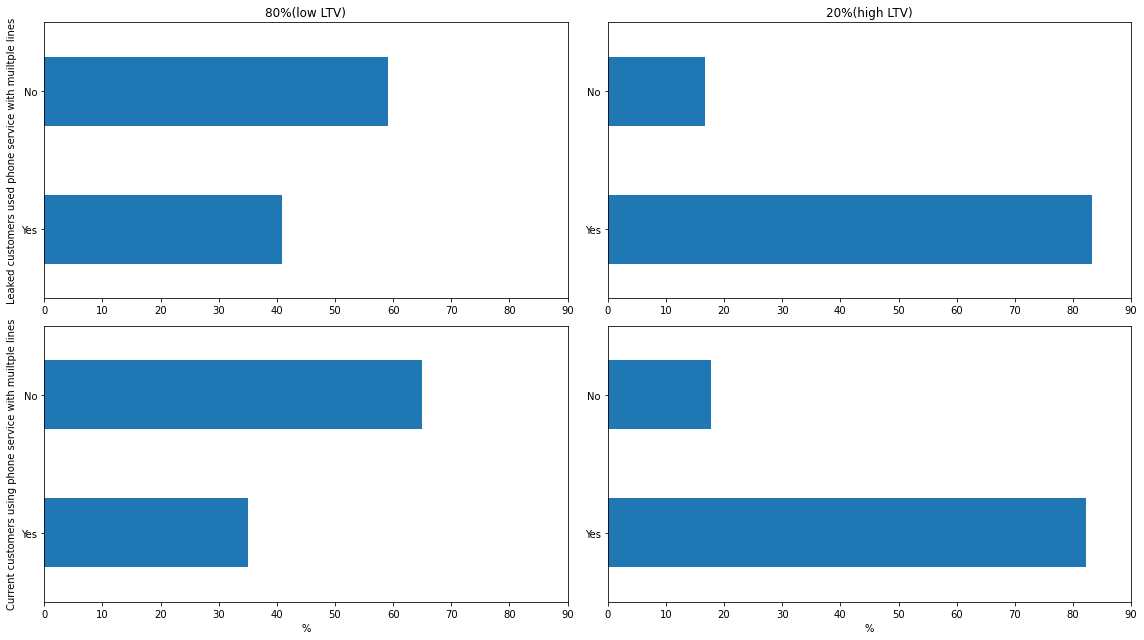

In [21]:
# Investigate the proportion of people who used phone service with muiltple lines by each groups
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
TotalCharges_under80_use_phone = TotalCharges_under80.query('PhoneService=="Yes"')
(((TotalCharges_under80_use_phone.MultipleLines.value_counts()/TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Leaked customers used phone service with muiltple lines', title="80%(low LTV)",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
TotalCharges_above80_use_phone = TotalCharges_above80.query('PhoneService=="Yes"')
((TotalCharges_above80_use_phone.MultipleLines.value_counts()/TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc(title="20%(high LTV)", xticks1=range(0,100,10),xticks2=range(0,100,10));

# Investigate the proportion of people who used phone service withn muiltple lines by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone = paying_TotalCharges_under80.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Current customers using phone service with muiltple lines', xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone = paying_TotalCharges_above80.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc( xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.tight_layout()

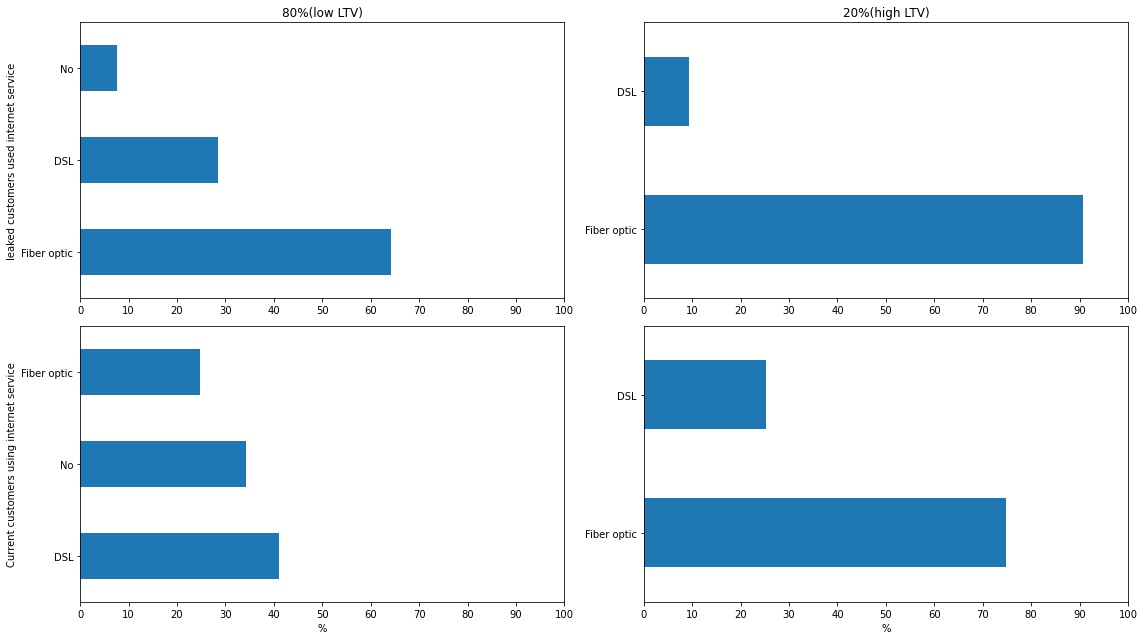

In [22]:
# Visualization
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.InternetService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='leaked customers used internet service',title="80%(low LTV)", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.InternetService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV)", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.InternetService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='Current customers using internet service', xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.InternetService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc(xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.tight_layout()

In [23]:
TotalCharges_under80_use_internet = TotalCharges_under80.query('InternetService!="No"')
proportion_internet_sub_service = np.array([TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0]])*100

In [24]:
TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
proportion_internet_sub_service_above80 = np.array([TotalCharges_above80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],                                                
TotalCharges_above80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0]])*100

In [25]:
paying_TotalCharges_under80_use_internet = paying_TotalCharges_under80.query('InternetService!="No"')
paying_proportion_internet_sub_service_under80 = np.array([paying_TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0]])*100

In [26]:
paying_TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
paying_proportion_internet_sub_service_above80 = np.array([paying_TotalCharges_above80.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],                                                
paying_TotalCharges_above80.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0]])*100

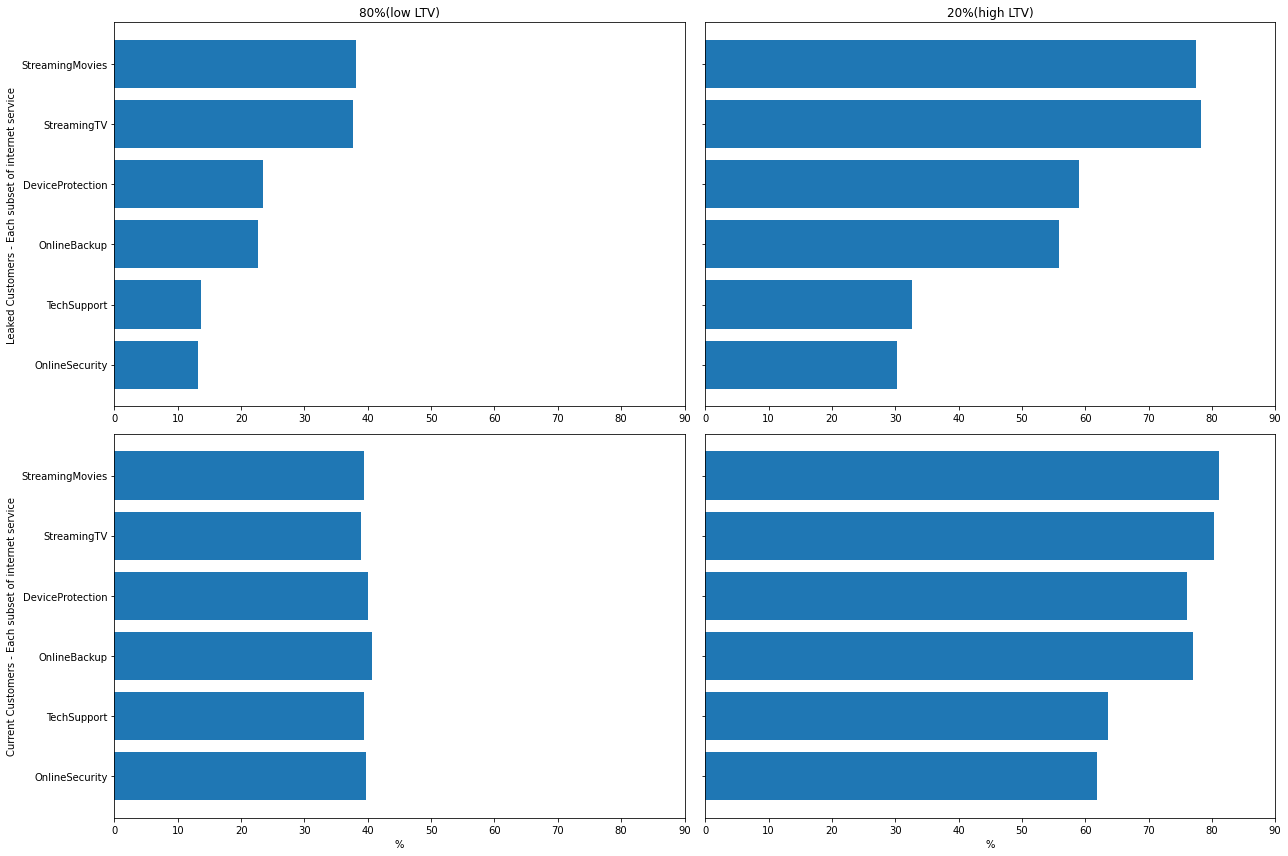

In [27]:
# Investigate the Proportion by subset of internet service by each groups
plt.figure(figsize = [18, 12])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service)
desc(ylabel='Leaked Customers - Each subset of internet service',title='80%(low LTV)',yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service_above80)
desc(title='20%(high LTV)',yticks1=range(0,6),yticks2=['','','','','',''],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

# Investigate the Proportion by subset of internet service by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6),paying_proportion_internet_sub_service_under80)
desc(ylabel='Current Customers - Each subset of internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), paying_proportion_internet_sub_service_above80)
desc(xlabel="%",yticks1=range(0,6),yticks2=['','','','','',''],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

In [28]:
# The average LTV in 80%(low LTV) of data of leaked customers is 750
# The average LTV in 20%(high LTV) of data of leaked customers is 4750

# Extract the 80%(low LTV) of data that the LTV is higher than 750
paying_TotalCharges_under80_higherthanleak = paying_TotalCharges_under80.query('TotalCharges>750')
# Extract the 20%(high LTV) of data that the LTV is higher than 4750
paying_TotalCharges_above80_higherthanleak = paying_TotalCharges_above80.query('TotalCharges>4750')

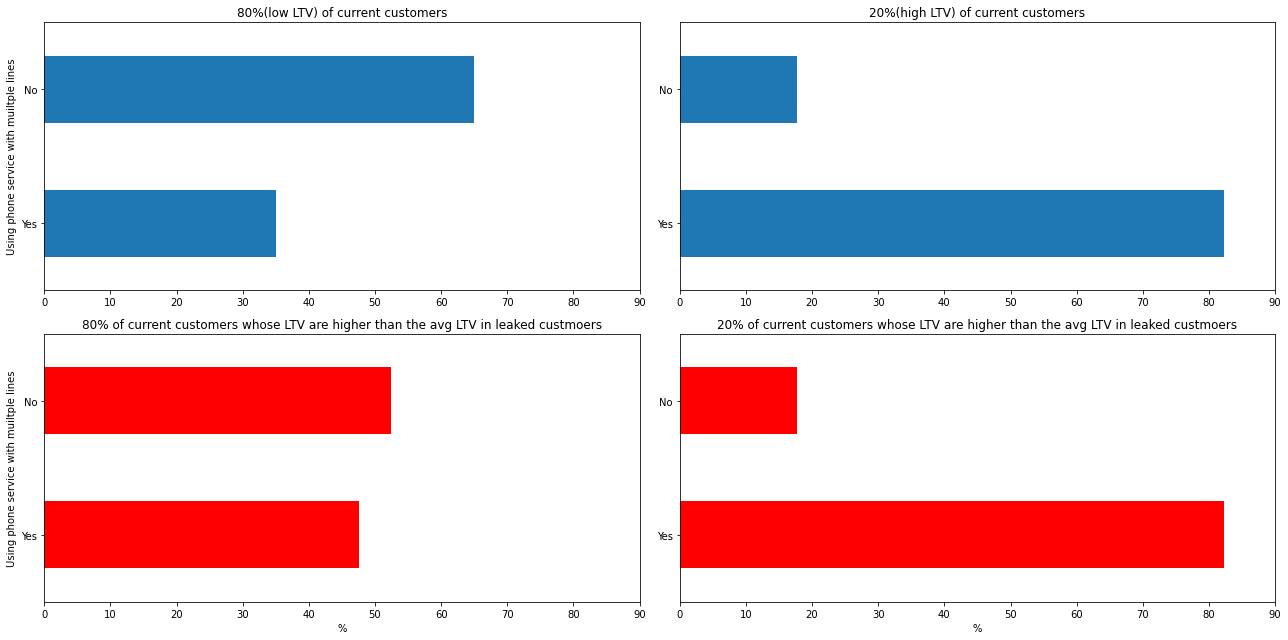

In [29]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [18, 9])
# Investigate the proportion of people used phone service by each groups

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone = paying_TotalCharges_under80.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Using phone service with muiltple lines', title="80%(low LTV) of current customers",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone = paying_TotalCharges_above80.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc(title="20%(high LTV) of current customers",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone_higherthanleak = paying_TotalCharges_under80_higherthanleak.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone_higherthanleak.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone_higherthanleak.shape[0]).sort_values(ascending=True))*100).plot.barh(color='r');
desc(ylabel='Using phone service with muiltple lines',title="80% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone_higherthanleak = paying_TotalCharges_above80_higherthanleak.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone_higherthanleak.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone_higherthanleak.shape[0])*100).plot.barh(color='r');
desc(title="20% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));
plt.tight_layout()

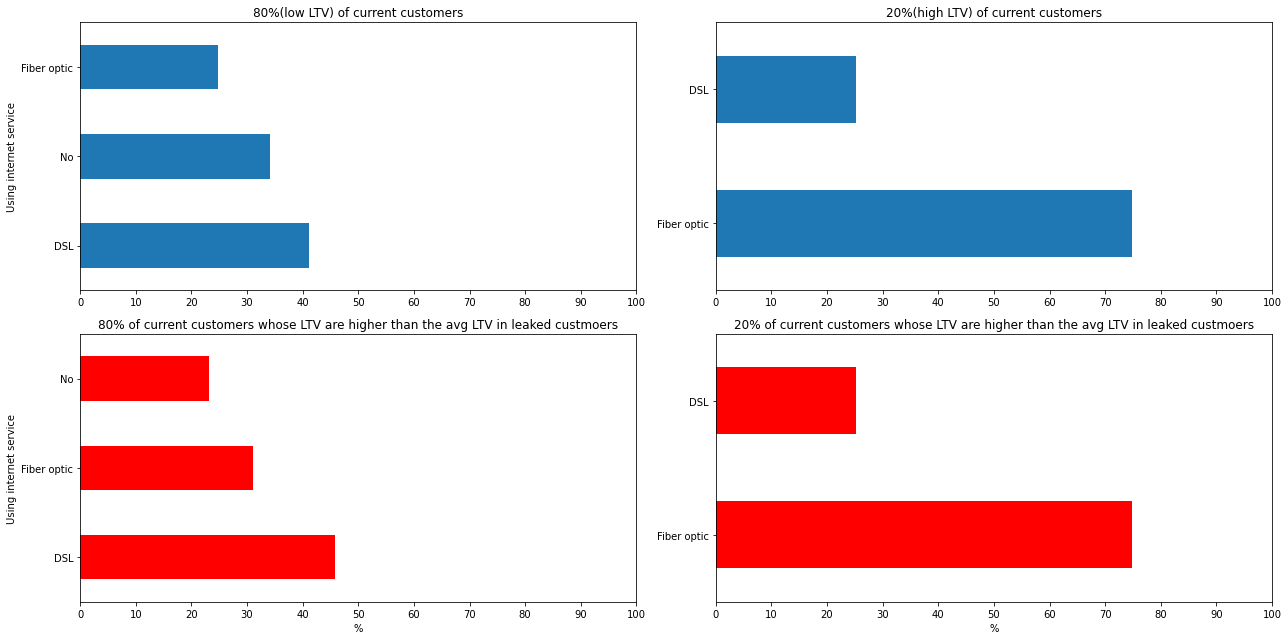

In [30]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [18, 9])
# Investigate the proportion of people used phone service by each groups

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.InternetService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='Using internet service',title="80%(low LTV) of current customers", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.InternetService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV) of current customers", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80_higherthanleak.InternetService.value_counts()/paying_TotalCharges_under80_higherthanleak.shape[0])*100).plot.barh(color="r");
desc(ylabel='Using internet service',title="80% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80_higherthanleak.InternetService.value_counts()/paying_TotalCharges_above80_higherthanleak.shape[0])*100).plot.barh(color="r");
desc(title="20% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));
plt.tight_layout()

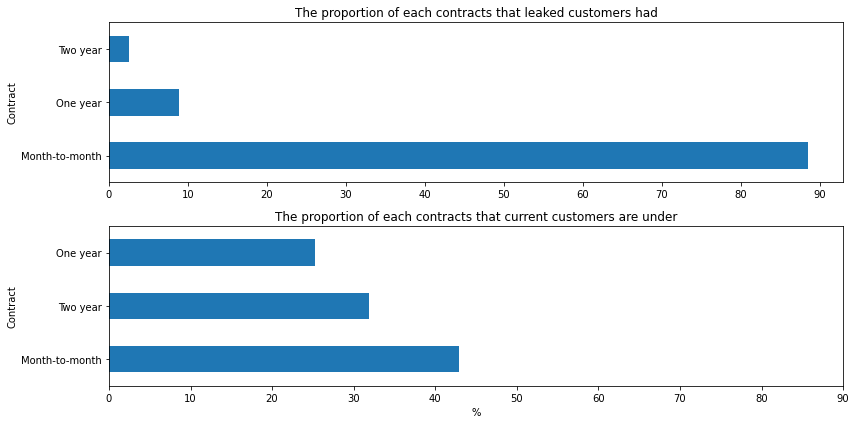

In [31]:
plt.figure(figsize = [12, 6])
# Visualize the plot of leaked customers
plt.subplot(2, 1, 1)
((Churn_df.Contract.value_counts()/Churn_df.shape[0])*100).plot.barh();
desc(xticks1=range(0,100,10),xticks2=range(0,100,10),ylabel='Contract',title="The proportion of each contracts that leaked customers had")

# Visualize the plot of current customers
plt.subplot(2, 1, 2)
((paying_df.Contract.value_counts()/paying_df.shape[0])*100).plot.barh();
desc(xticks1=range(0,100,10),xticks2=range(0,100,10),ylabel='Contract',xlabel="%",title="The proportion of each contracts that current customers are under")
plt.tight_layout()

## 7. Multiple Linear Regression:

Dummy variables are created for categorical features, and a multiple linear regression model is fitted to understand the relationship between various factors and 'TotalCharges'.
The coefficients of the model are then visualized to see the impact of different variables on 'TotalCharges'.

In [32]:
df_copy[['Female', 'Male']] = pd.get_dummies(df_copy['gender'])
df_copy[['No', 'Have Partner']] = pd.get_dummies(df_copy['Partner'])
df_copy[['No Dependent', 'Dependents_Yes']] = pd.get_dummies(df_copy['Dependents'])
df_copy[['No', 'PhoneService']] = pd.get_dummies(df_copy['PhoneService'])
df_copy[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(df_copy['InternetService'])
df_copy[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(df_copy['Contract'])
df_copy[['matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']] = pd.get_dummies(df_copy['PaymentMethod'])

In [33]:
# use mutiple linear regression
df_copy['intercept'] = 1
lm = sm.OLS(df_copy['TotalCharges'], df_copy[['intercept', 'Male', 'Have Partner', 'No Dependent',
                                               'PhoneService', 'DSL', 'Fiber optic', 'One year', 'Two year',
                                               'matBank transfer (autoic)', 'Credit card (automatic)', 
                                                'Electronic check']])
results = lm.fit()

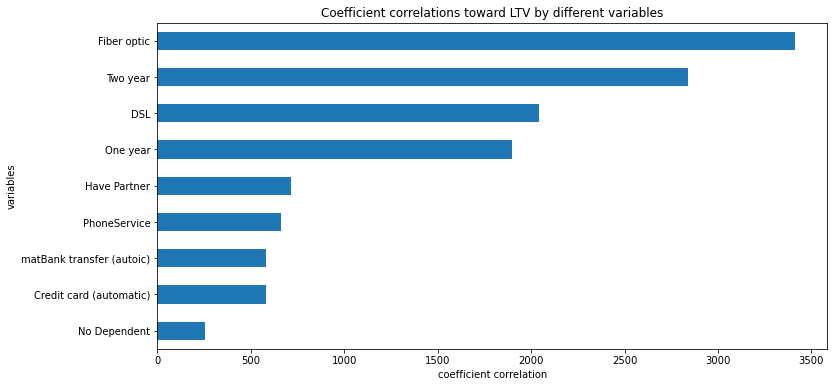

In [34]:
# Visualize the order of the variables that affects LTV from high to low.
plt.figure(figsize = [12, 6])
results.params.sort_values()[3:].plot.barh()
desc(xlabel="coefficient correlation", ylabel='variables',title='Coefficient correlations toward LTV by different variables');

## 8. Analysis of Internet Service Subsets:

Dummy variables are created for different subsets of internet services, and another multiple linear regression is performed to understand their impact on 'TotalCharges'.
The coefficients of this model are visualized to analyze the contribution of each subset of internet services to 'TotalCharges'.

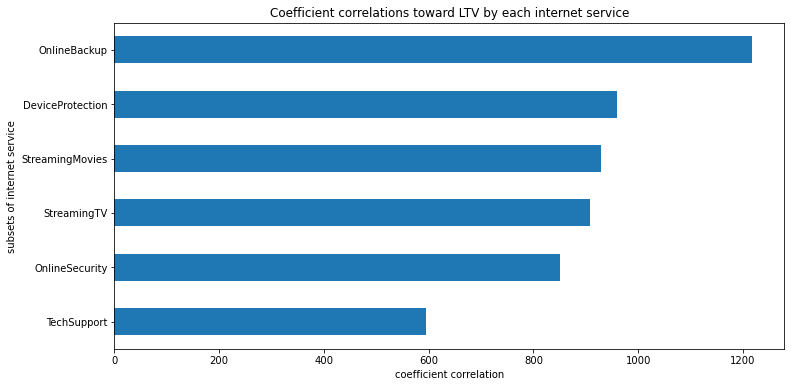

In [35]:
# convert the categorical variables to 0,1
df_copy[['No','No internet service', 'OnlineSecurity']] = pd.get_dummies(df_copy['OnlineSecurity'])
df_copy[['No','No internet service', 'OnlineBackup']] = pd.get_dummies(df_copy['OnlineBackup'])
df_copy[['No','No internet service', 'DeviceProtection']] = pd.get_dummies(df_copy['DeviceProtection'])
df_copy[['No','No internet service', 'TechSupport']] = pd.get_dummies(df_copy['TechSupport'])
df_copy[['No','No internet service', 'StreamingTV']] = pd.get_dummies(df_copy['StreamingTV'])
df_copy[['No','No internet service', 'StreamingMovies']] = pd.get_dummies(df_copy['StreamingMovies'])

# use mutiple linear regression
# and visualize the order of the variables that affects LTV from high to low.
df_copy['intercept'] = 1
lm = sm.OLS(df_copy['TotalCharges'], df_copy[['intercept', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                               'TechSupport', 'StreamingTV', 
                                                'StreamingMovies']])
results = lm.fit()
plt.figure(figsize = [12, 6])
results.params.sort_values()[1:].plot.barh();
desc(xlabel="coefficient correlation", ylabel='subsets of internet service',title='Coefficient correlations toward LTV by each internet service');

The code combines exploratory data analysis, data cleaning, and predictive modeling to gain insights into customer churn and factors influencing customer lifetime value ('TotalCharges'). The visualizations help in understanding patterns and trends in the dataset, providing valuable information for business decisions related to customer retention strategies.